In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycbc.waveform import get_fd_waveform

/home/user/miniconda3/envs/test_install/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
try:
    plt.style.use('plot_stylesheet.sty')
except Exception:
    pass

In [ ]:
wf_params = {
    'mass1': 30,
    'mass2': 20,
    'f_lower': 20,
    'f_final': 1024,
    'delta_f': 1.0 / 64.0,
    'delta_t': 1.0 / 2048.0,
    'spin1z': 0,
    'spin2z': 0,
    'distance': 100,
    'inclination': 0.2,
}

## Frequency Domain Output

### No Modification

Sanity check, should reproduce output of `get_fd_waveform`

In [4]:
hpf_ref, hcf_ref = get_fd_waveform(
    approximant='IMRPhenomPv2',
    **wf_params,
)

In [5]:
wf_no_mod_params = {
    'modification_type': 'constant_shift',
    'error_in_phase': 'relative',
    'delta_amplitude': 0.0,
    'delta_phase': 0.0,
}

hpf_no_mod, hcf_no_mod = get_fd_waveform(
    approximant='wferrors',
    baseline_approximant='IMRPhenomPv2',
    **wf_params,
    **wf_no_mod_params,
)

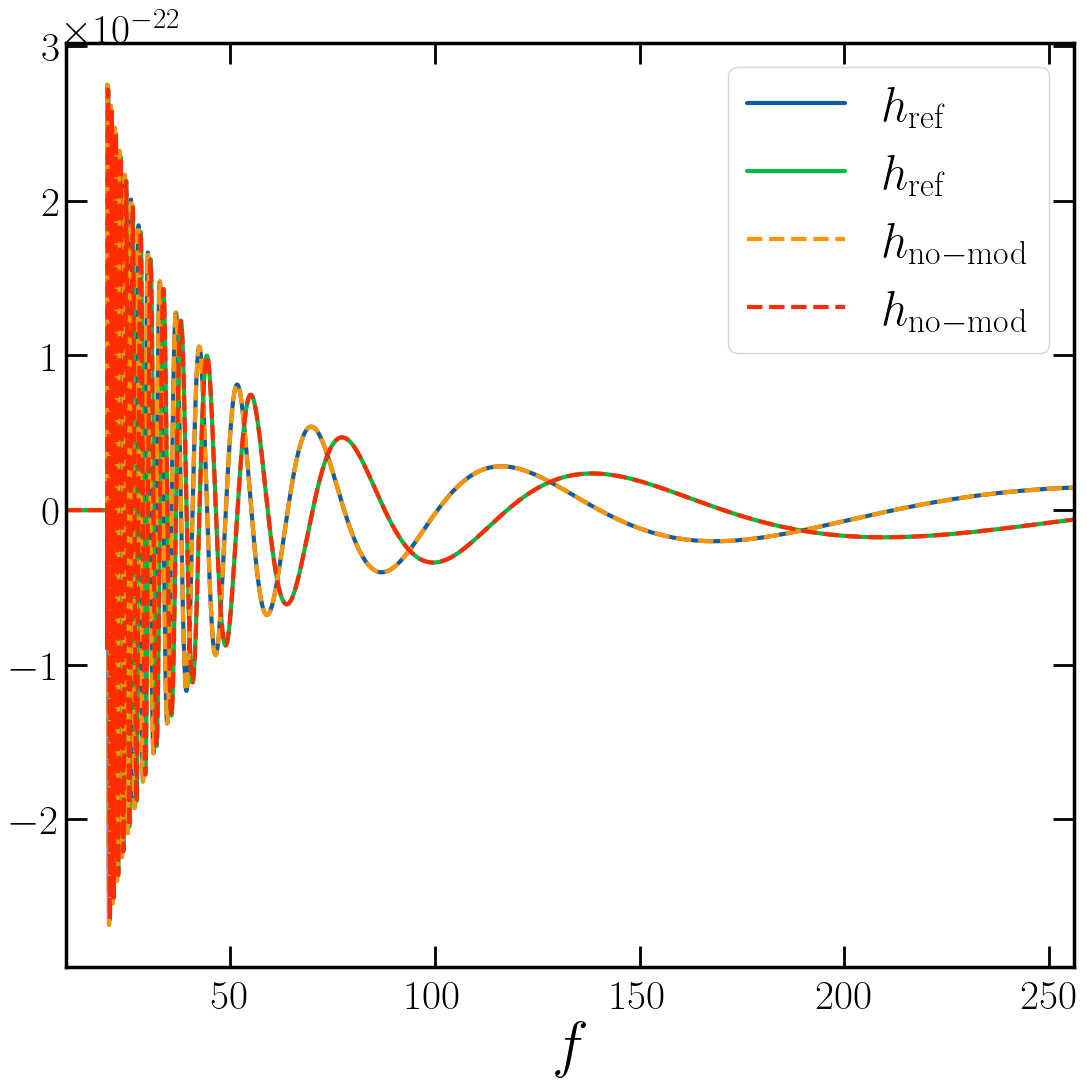

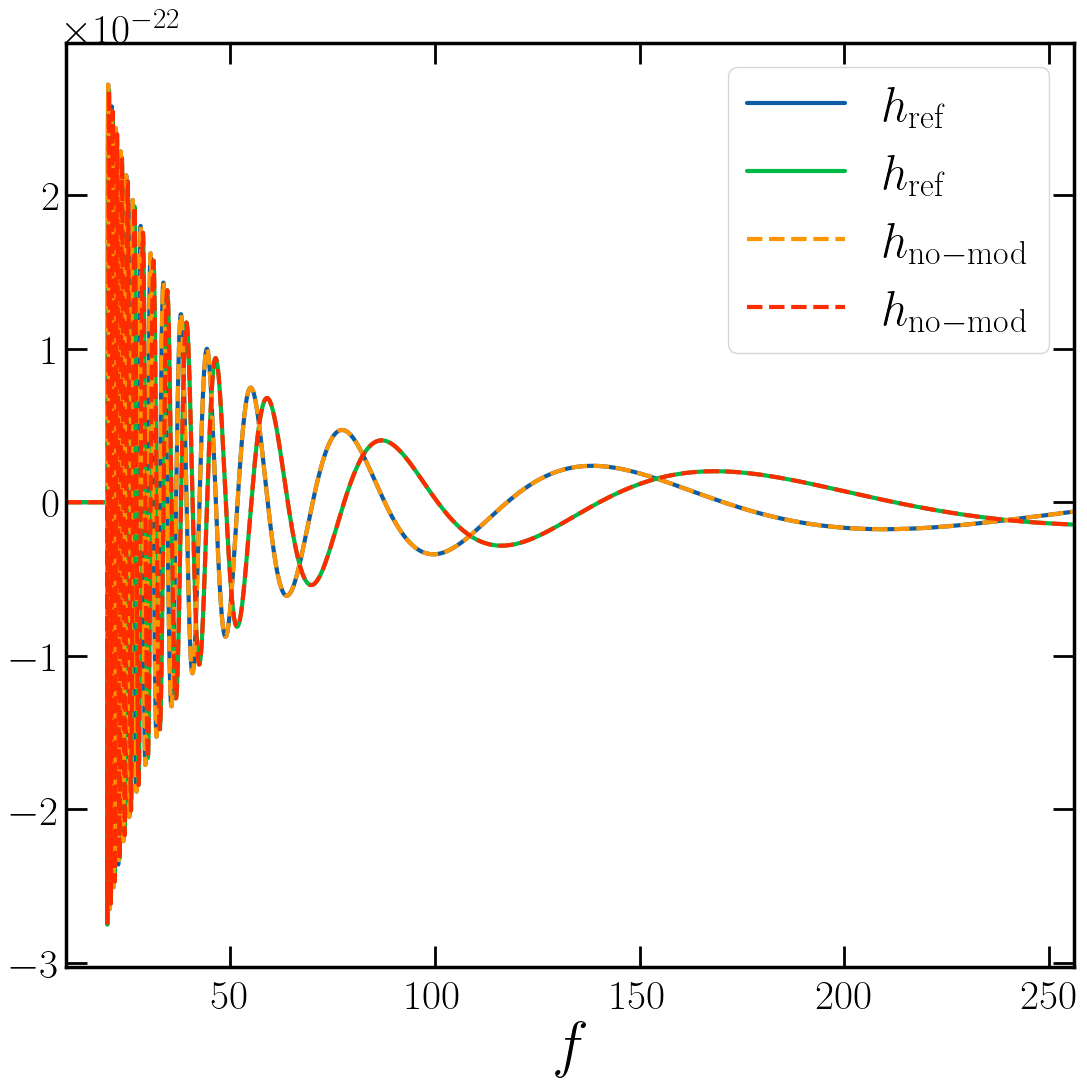

In [6]:
hpf_ref.plot(label=r'$h_\mathrm{ref}$')
hpf_no_mod.plot(ls='--', label=r'$h_\mathrm{no-mod}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

hcf_ref.plot(label=r'$h_\mathrm{ref}$')
hcf_no_mod.plot(ls='--', label=r'$h_\mathrm{no-mod}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

Two plots each due to real and imaginary part. All curves agree perfectly.

### Constant Errors

In [7]:
wf_amp_mod_params = {
    'modification_type': 'constant_shift',
    'error_in_phase': 'relative',
    'delta_amplitude': 0.1,
    'delta_phase': 0.0,
}

hpf_amp_mod, hcf_amp_mod = get_fd_waveform(
    approximant='wferrors',
    baseline_approximant='IMRPhenomPv2',
    **wf_params,
    **wf_amp_mod_params,
)

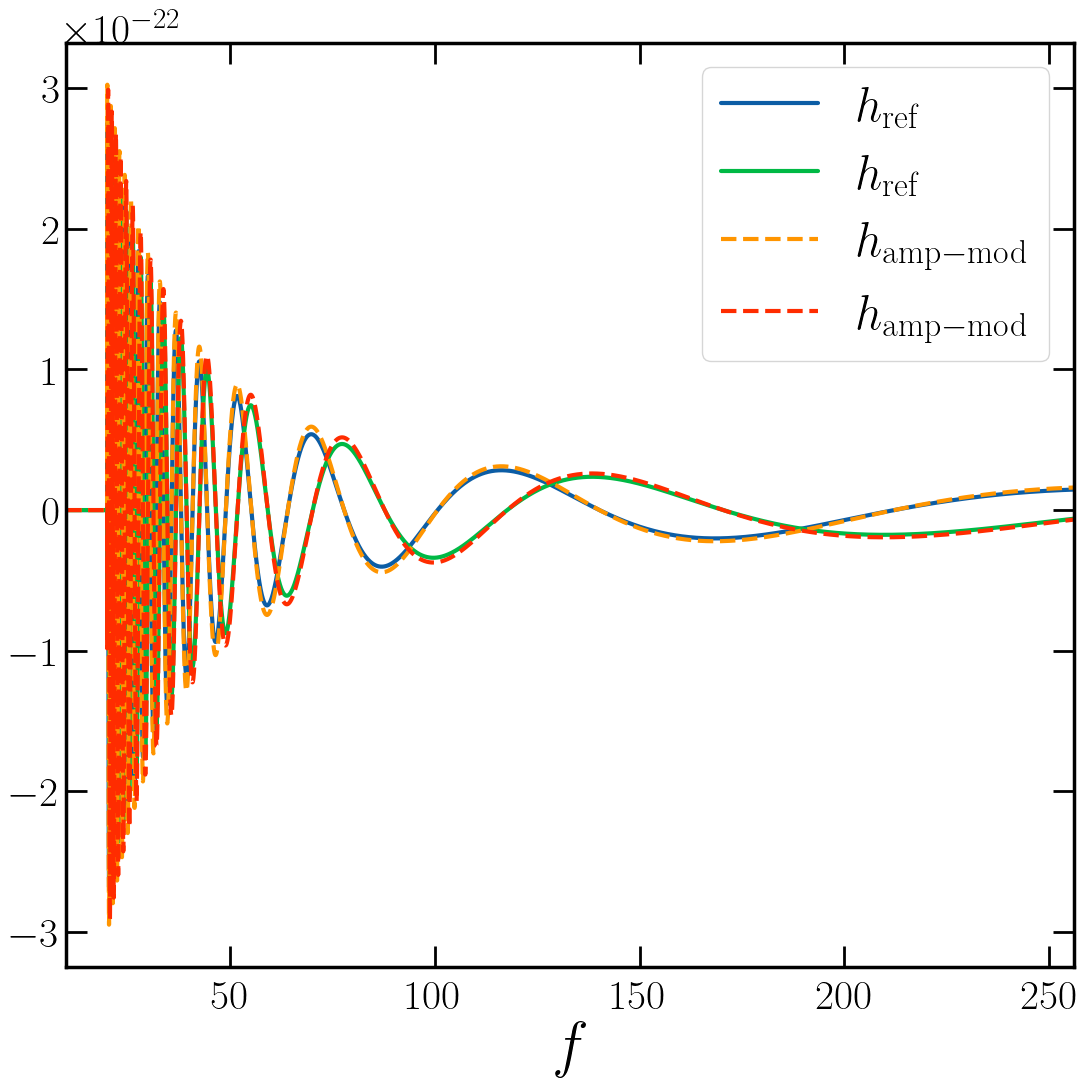

In [8]:
hpf_ref.plot(label=r'$h_\mathrm{ref}$')
hpf_amp_mod.plot(ls='--', label=r'$h_\mathrm{amp-mod}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

In [9]:
wf_phase_mod_params = {
    'modification_type': 'constant_shift',
    'error_in_phase': 'relative',
    'delta_amplitude': 0.0,
    'delta_phase': 0.1,
}

hpf_phase_mod, hcf_phase_mod = get_fd_waveform(
    approximant='wferrors',
    baseline_approximant='IMRPhenomPv2',
    **wf_params,
    **wf_phase_mod_params,
)

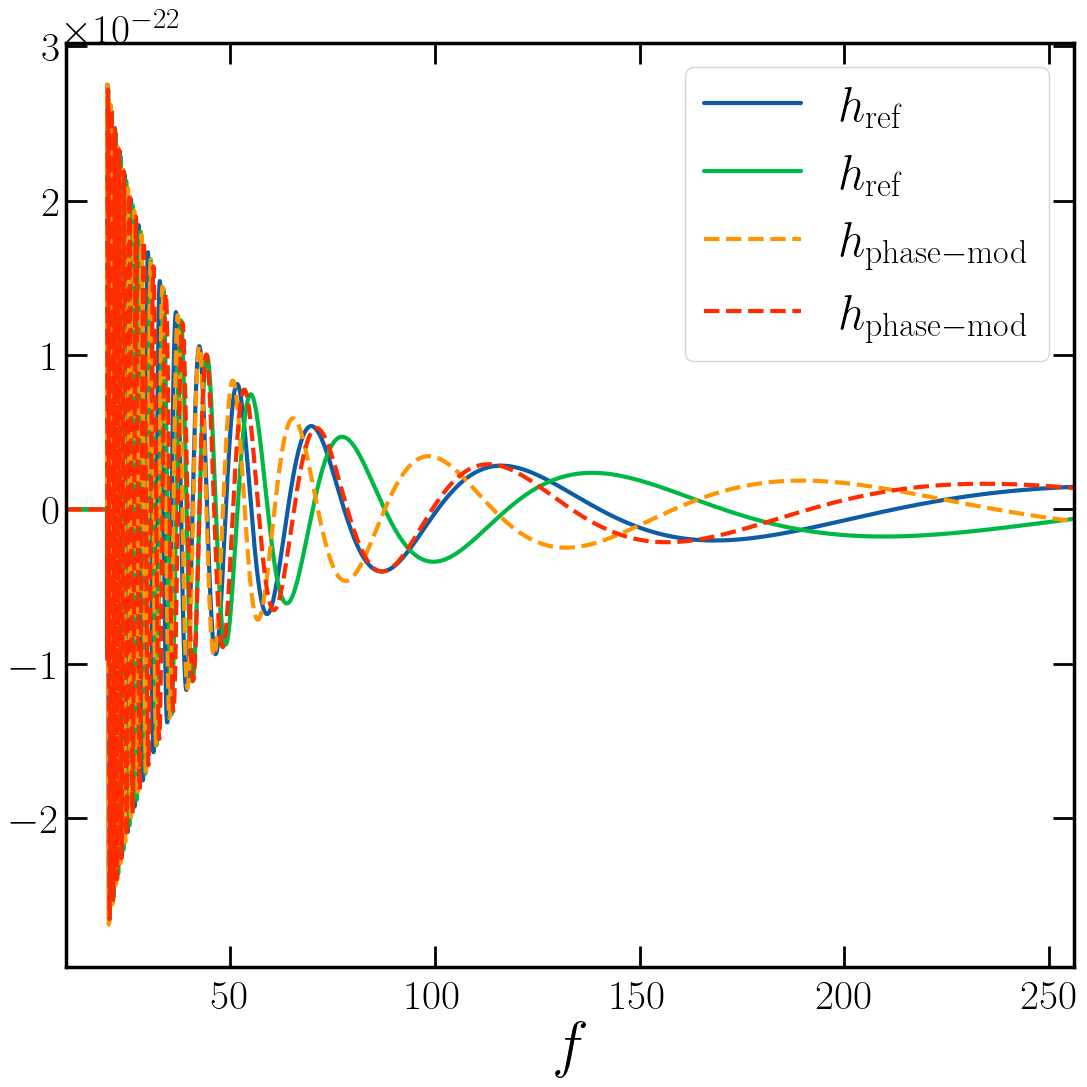

In [10]:
hpf_ref.plot(label=r'$h_\mathrm{ref}$')
hpf_phase_mod.plot(ls='--', label=r'$h_\mathrm{phase-mod}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

In [11]:
wf_mod_params = {
    'modification_type': 'constant_shift',
    'error_in_phase': 'relative',
    'delta_amplitude': 0.1,
    'delta_phase': 0.1,
}

hpf_mod, hcf_mod = get_fd_waveform(
    approximant='wferrors',
    baseline_approximant='IMRPhenomPv2',
    **wf_params,
    **wf_mod_params,
)

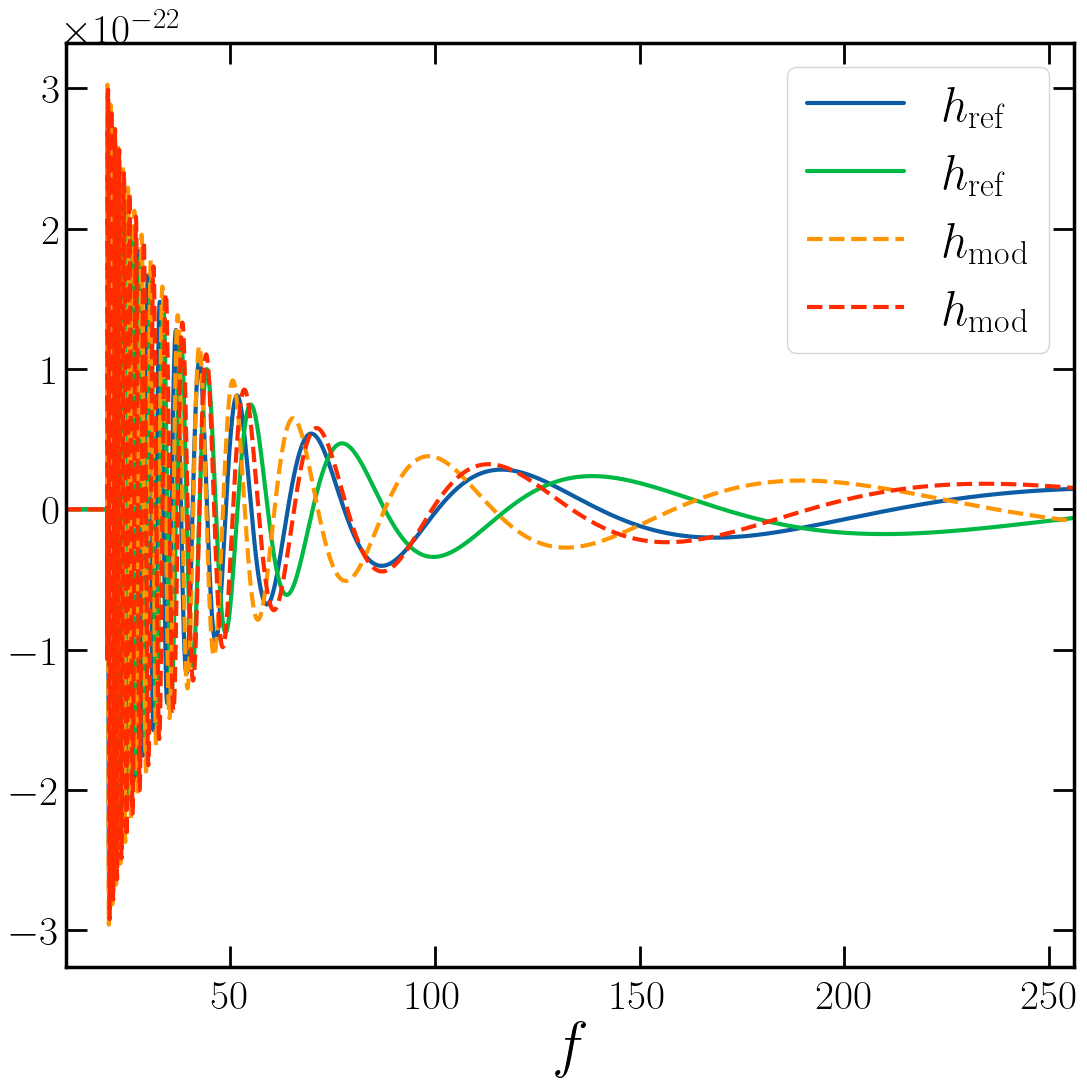

In [12]:
hpf_ref.plot(label=r'$h_\mathrm{ref}$')
hpf_mod.plot(ls='--', label=r'$h_\mathrm{mod}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

### Cubic Spline Errors

In [13]:
f_low_calibration = wf_params['f_lower']
f_high_calibration = wf_params['f_final']

n_wf_nodal_points = 10
wf_nodal_points = np.logspace(
    np.log10(f_low_calibration), np.log10(f_high_calibration), n_wf_nodal_points
)


ampl_mean_err = 0.1
ampl_stddev_err = 0.05

phase_mean_err = 0.1
phase_stddev_err = 0.05

np.random.seed(42)
delta_amplitude_arr = (
    np.random.standard_normal(n_wf_nodal_points) * ampl_stddev_err + ampl_mean_err
)
delta_phase_arr = (
    np.random.standard_normal(n_wf_nodal_points) * phase_stddev_err + phase_mean_err
)


wf_mod_spline_params = {
    'modification_type': 'cubic_spline',
    'error_in_phase': 'relative',
    'delta_amplitude': delta_amplitude_arr,
    'delta_phase': delta_phase_arr,
    'nodal_points': wf_nodal_points,
}

hpf_mod_spline, hcf_mod_spline = get_fd_waveform(
    approximant='wferrors',
    baseline_approximant='IMRPhenomPv2',
    **wf_params,
    **wf_mod_spline_params,
)

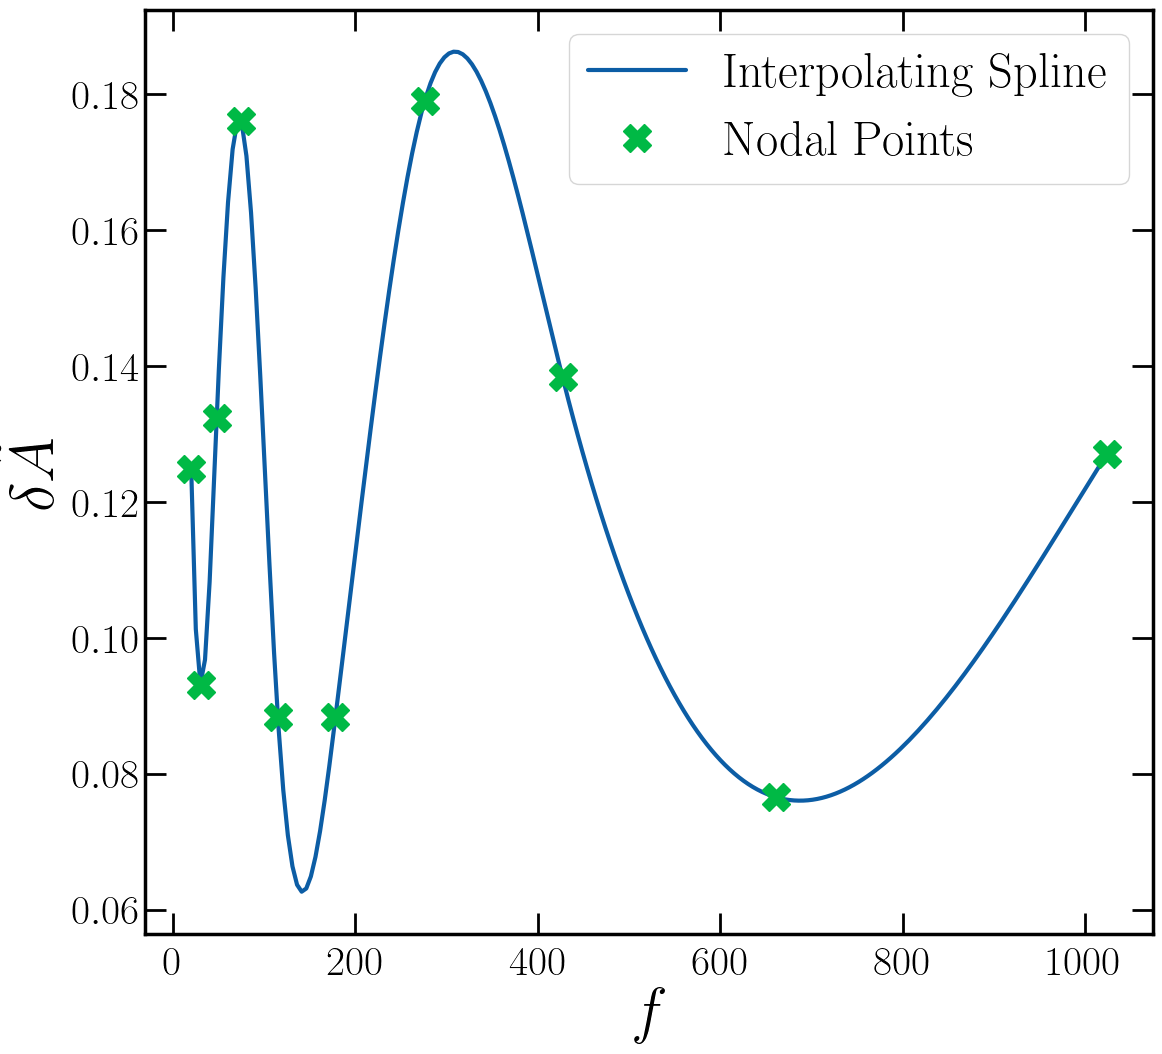

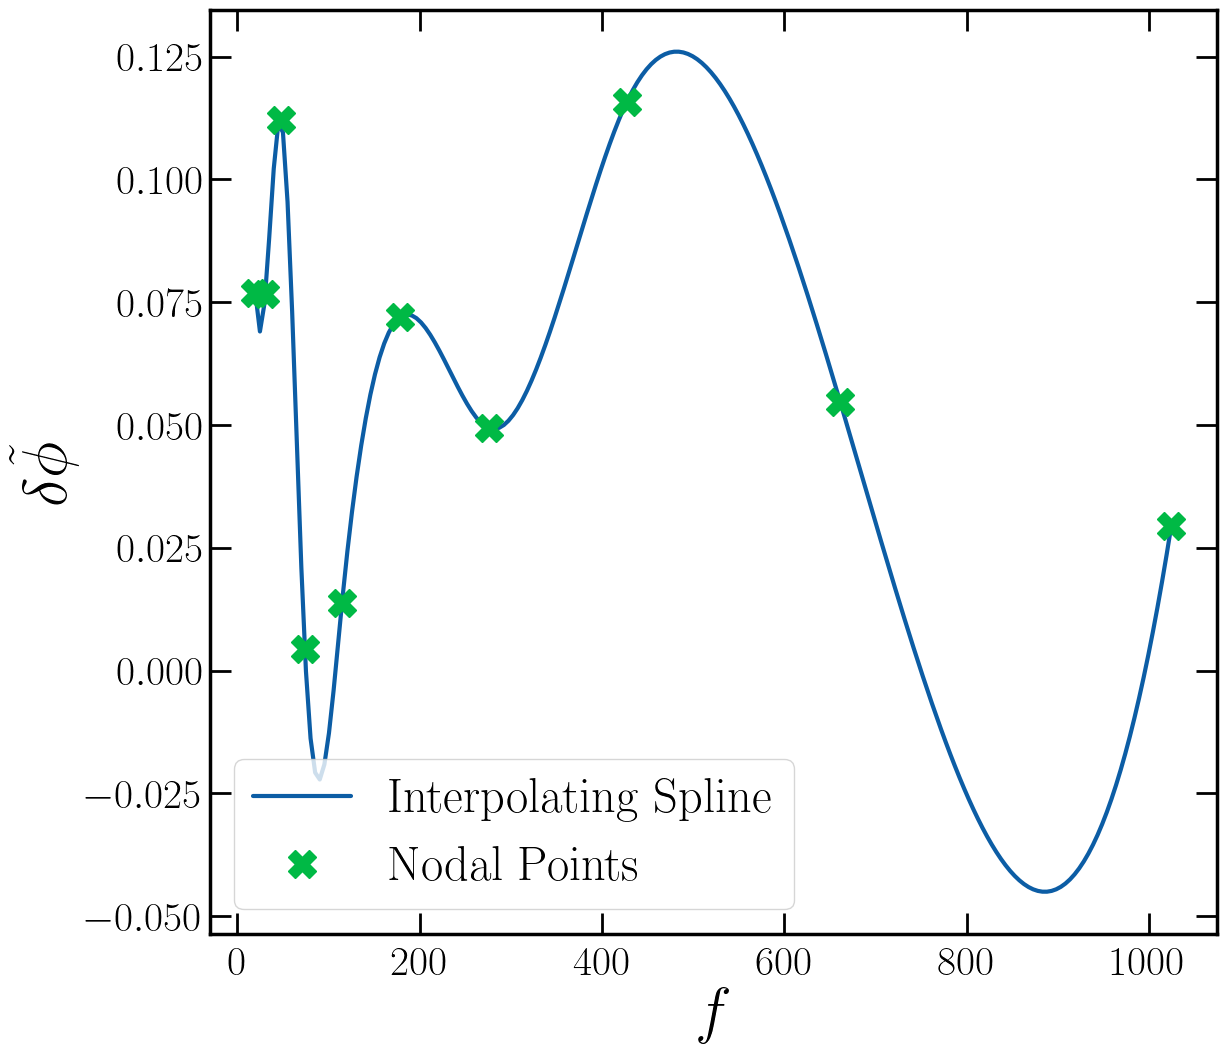

In [14]:
from scipy.interpolate import CubicSpline

delta_amplitude_interp = CubicSpline(wf_nodal_points, delta_amplitude_arr)
delta_phase_interp = CubicSpline(wf_nodal_points, delta_phase_arr)

plot_points = np.linspace(f_low_calibration, f_high_calibration, num=200)

plt.plot(plot_points, delta_amplitude_interp(plot_points), label='Interpolating Spline')
plt.plot(wf_nodal_points, delta_amplitude_arr, 'X', label='Nodal Points')

plt.legend()
plt.xlabel(r'$f$')
plt.ylabel(r'$\delta \tilde{A}$')

plt.show()


plt.plot(plot_points, delta_phase_interp(plot_points), label='Interpolating Spline')
plt.plot(wf_nodal_points, delta_phase_arr, 'X', label='Nodal Points')

plt.legend()
plt.xlabel(r'$f$')
plt.ylabel(r'$\delta \tilde{\phi}$')

plt.show()

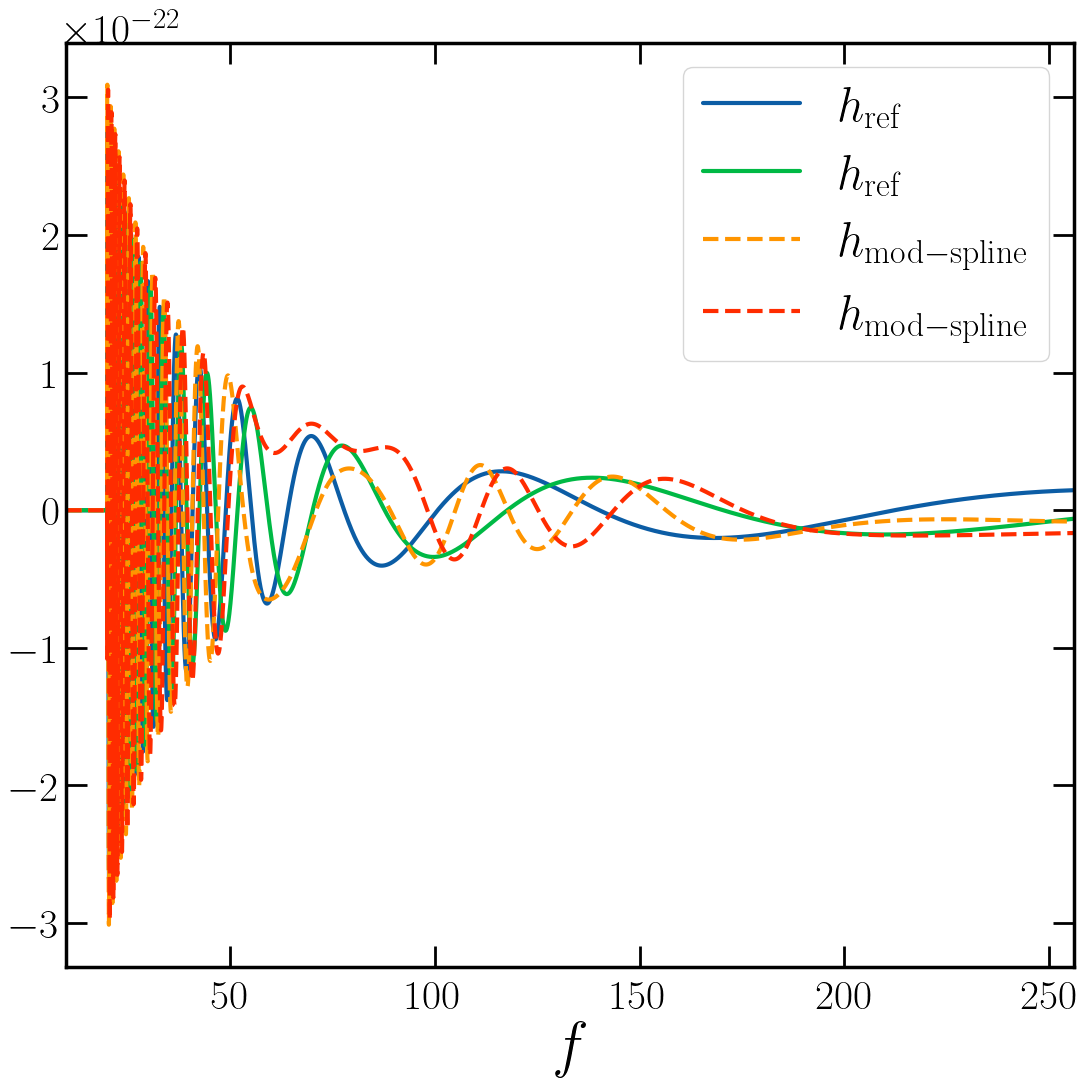

In [15]:
hpf_ref.plot(label=r'$h_\mathrm{ref}$')
hpf_mod_spline.plot(ls='--', label=r'$h_\mathrm{mod-spline}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()

### Detector Strain

While calling `get_fd_det_waveform` is currently not supported, we can make use of the capability to generate the GW polarization and perform the detector projection manually.

In [16]:
t_ref = 0

extr_params = dict(
    ra=1.2,
    dec=0.6,
    polarization=0.8,
    t_ref=t_ref,
)

In [17]:
from pycbc.detector import Detector

hanford = Detector(
    'H1',
    reference_time=t_ref,
)

In [18]:
fp, fc = hanford.antenna_pattern(
    right_ascension=extr_params['ra'],
    declination=extr_params['dec'],
    polarization=extr_params['polarization'],
    t_gps=hanford.reference_time,
    # t_gps=float(t_ref),
)

hf_ref = fp * hpf_ref + fc * hcf_ref
hf_mod_spline = fp * hpf_mod_spline + fc * hcf_mod_spline


# from pycbc.waveform import apply_fseries_time_shift
# hf_ref = apply_fseries_time_shift(hf_ref, dt)

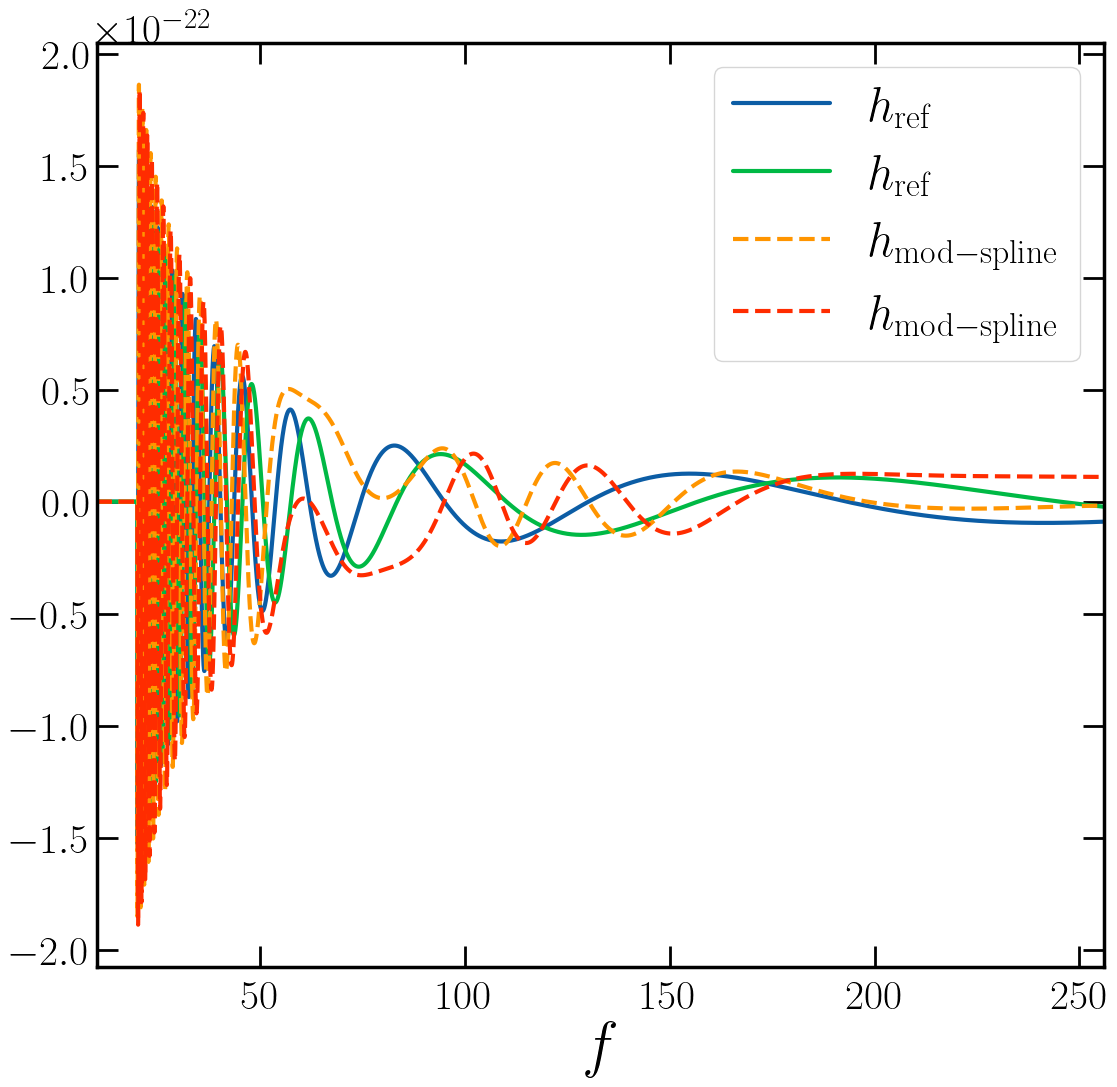

In [19]:
hf_ref.plot(label=r'$h_\mathrm{ref}$')
hf_mod_spline.plot(ls='--', label=r'$h_\mathrm{mod-spline}$')

plt.legend()
plt.xlabel(r'$f$')
plt.xlim(10, 256)

plt.show()